In [13]:
%matplotlib inline

## Physical Activity, Obesity and Nutrition Analysis Across Different Age Groups in the US
  - Your analysis here
  -----------------------------------

In [2]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

#import your datasNutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_Systemcsv file 
file1 = Path('data/Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv')
file2=Path('data/Income_Behavioral_Risk_Factor_Surveillance_system.csv')

age_group_df = pd.read_csv(file1)
income_df = pd.read_csv(file2)

#merge the dataframes
data_df=pd.merge(age_group_df,income_df, on='LocationID', how='inner')

data_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Datasource_x,Class_x,Topic_x,Question_x,Data_Value_Unit_x,Data_Value_Type_x,...,Race/Ethnicity_y,GeoLocation_y,ClassID_y,TopicID_y,QuestionID_y,DataValueTypeID_y,StratificationCategory1_y,Stratification1_y,StratificationCategoryId1_y,StratificationID1_y
0,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,Income,"Less than $15,000",INC,INCLESS15
1,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,Income,"Less than $15,000",INC,INCLESS15
2,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q037,VALUE,Income,"$25,000 - $34,999",INC,INC2535
3,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",OWS,OWS1,Q036,VALUE,Income,"$50,000 - $74,999",INC,INC5075
4,2020,2020,WY,Wyoming,Behavioral Risk Factor Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,NaN,Value,...,NaN,"(43.23554134300048, -108.10983035299967)",PA,PA1,Q047,VALUE,Income,"$50,000 - $74,999",INC,INC5075


#Dataset cleaning

In [3]:
# delete the unwanted columns or create a new dataframe with only the needed columns

reduced_df = data_df[['YearStart_x','YearEnd_x','LocationAbbr_x','LocationDesc_x','Class_x','Question_x','Data_Value_x','Age(years)','LocationID','Income_y']]

reduced_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Class_x,Question_x,Data_Value_x,Age(years),LocationID,Income_y
0,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
1,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
2,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$25,000 - $34,999"
3,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"
4,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"


In [4]:
# finding the number of missing values in each column
reduced_df.isnull().sum()

YearStart_x          0
YearEnd_x            0
LocationAbbr_x       0
LocationDesc_x       0
Class_x              0
Question_x           0
Data_Value_x      2310
Age(years)           0
LocationID           0
Income_y             0
dtype: int64

In [5]:
# Remove remaining rows with missing data

reduced_df = reduced_df.dropna(how='any')

reduced_df.head()

,YearStart_x,YearEnd_x,LocationAbbr_x,LocationDesc_x,Class_x,Question_x,Data_Value_x,Age(years),LocationID,Income_y
0,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
1,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"Less than $15,000"
2,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$25,000 - $34,999"
3,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"
4,2020,2020,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,56,"$50,000 - $74,999"


In [7]:
#Rename columns 
reduced_df = reduced_df.rename(columns={'YearStart_x':'YearStart','YearEnd_x':'YearEnd',
                                        'LocationAbbr_x':'LocationAbbr','LocationDesc_x':'LocationDesc',
                                        'Class_x':'Class','Question_x':'Question','Data_Value_x':'Percentage',
                                        'Age(years)':'AgeRange','Income_y':'Income'})

#Rearrange columns
reduced_df = reduced_df[['YearStart','YearEnd','LocationID','LocationAbbr','LocationDesc','Class','Question','Percentage',
                         'AgeRange','Income']]
reduced_df.head()

,YearStart,YearEnd,LocationID,LocationAbbr,LocationDesc,Class,Question,Percentage,AgeRange,Income
0,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"Less than $15,000"
1,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"Less than $15,000"
2,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$25,000 - $34,999"
3,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$50,000 - $74,999"
4,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,"$50,000 - $74,999"


In [8]:
# We replace the income column with a numeric income value column
reduced_df['Income'] = reduced_df['Income'].replace({'Less than $15,000': 10000, '$25,000 - $34,999': 30000, '$50,000 - $74,999':60000 ,
                                                      '$35,000 - $49,999': 40000, 'Data not reported':0, '$75,000 or greater': 75000,
                                                      '$15,000 - $24,999':20000})


reduced_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25972\72558535.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reduced_df['Income'] = reduced_df['Income'].replace({'Less than $15,000': 10000, '$25,000 - $34,999': 30000, '$50,000 - $74,999':60000 ,


,YearStart,YearEnd,LocationID,LocationAbbr,LocationDesc,Class,Question,Percentage,AgeRange,Income
0,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,10000
1,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,10000
2,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,30000
3,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,60000
4,2020,2020,56,WY,Wyoming,Physical Activity,Percent of adults who engage in no leisure-tim...,24.0,55 - 64,60000


#### Identify US states with the highest and lowest levels of overweight classification and Obesity for different age-groups
------------------

In [9]:
#Define the age categories
age_categories=reduced_df['AgeRange'].unique()
#Define the question to filter our dataframe for each
questions = ['Percent of adults aged 18 years and older who have an overweight classification',
             'Percent of adults aged 18 years and older who have obesity']

#empty list to store our results
results = []

#Iterate over each questin and age category in our dataframe 
for question in questions:
    for age_category in age_categories:
        #Filter the dataframe for the current question and age category
        filtered_df = reduced_df[(reduced_df['Question'] == question) & (reduced_df['AgeRange']==age_category)]

        if not filtered_df.empty:
            #Find the index of the maximum Data_Value
            max_row = filtered_df.loc[filtered_df['Percentage'].idxmax()]
            # Find the index of the mimimum Data_Value
            min_row = filtered_df.loc[filtered_df['Percentage'].idxmin()]

            #Appened the results in the results list
            results.append({'Question':question,
                            'Age_Category': age_category,
                            'Highest_State':max_row['LocationDesc'],
                            'Highest_Value':max_row['Percentage'],
                            'Lowest_State':min_row['LocationDesc'],
                            'Lowest_Value':min_row['Percentage']})
            
#Display the results

results_df = pd.DataFrame(results)
results_df = results_df.set_index(['Age_Category']).sort_values('Age_Category')

results_df.columns = pd.MultiIndex.from_product([['Obesity and Overweight classification'],results_df.columns])

# to display the complete 'Question' column values in our dataframe we use the set_option
pd.set_option('display.max_colwidth',None)
results_df


Obesity and Overweight classification  \
                                                                                     Question   
Age_Category                                                                                    
18 - 24       Percent of adults aged 18 years and older who have an overweight classification   
18 - 24                            Percent of adults aged 18 years and older who have obesity   
25 - 34       Percent of adults aged 18 years and older who have an overweight classification   
25 - 34                            Percent of adults aged 18 years and older who have obesity   
35 - 44       Percent of adults aged 18 years and older who have an overweight classification   
35 - 44                            Percent of adults aged 18 years and older who have obesity   
45 - 54       Percent of adults aged 18 years and older who have an overweight classification   
45 - 54                            Percent of adults aged 18 years and older who have obesity   
55 - 64       Percent of adults aged 18 years and older who have an overweight classification   
55 - 64                            Percent of adults aged 18 years and older who have obesity   
65 or older   Percent of adults aged 18 years and older who have an overweight classification   
65 or older                        Percent of adults aged 18 years and older who have obesity   

                                                                              
              Highest_State Highest_Value          Lowest_State Lowest_Value  
Age_Category                                                                  
18 - 24               Texas          33.2                Nevada         17.7  
18 - 24       West Virginia          30.8         New Hampshire         10.9  
25 - 34          New Mexico          38.4               Alabama         21.1  
25 - 34             Alabama          46.6  District of Columbia         16.5  
35 - 44              Nevada          44.7         West Virginia         27.8  
35 - 44       West Virginia          47.1  District of Columbia         24.6  
45 - 54          California          43.4  District of Columbia         28.1  
45 - 54         Mississippi          51.6         Massachusetts         26.1  
55 - 64           Tennessee          42.1           Mississippi         29.5  
55 - 64         Mississippi          47.9                Hawaii         22.6  
65 or older    Rhode Island          43.7  District of Columbia         33.2  
65 or older        Delaware          37.6                Hawaii         16.6

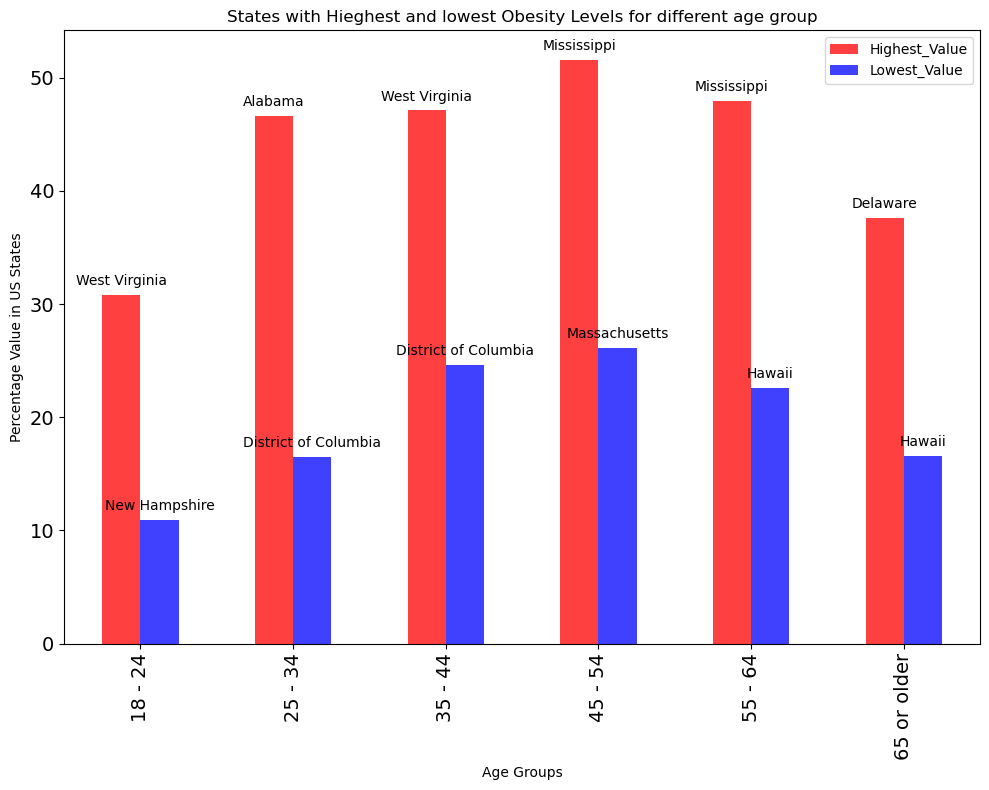

In [16]:
# Barchart for visualizing states with highest Obesity levels in different age groups
#filter our dataframe for obesity question
obesity = pd.DataFrame(results)
obesity = obesity.loc[(obesity['Question']=='Percent of adults aged 18 years and older who have obesity')]

obesity = obesity.set_index('Age_Category').sort_values('Age_Category')

#plotting our analysis finding for obesity levels in different age groups across US
figure1 = obesity.plot(kind='bar', color=['red','blue'], alpha=0.75 ,figsize=(10,8),
title='States with Hieghest and lowest Obesity Levels for different age group',
xlabel='Age Groups',ylabel='Percentage Value in US States', fontsize=14)

#setting states label for each of bars in the barplot
h_state = obesity['Highest_State']
l_state = obesity['Lowest_State']

#bar labels for states with highest and lowest obesity value for our plot figure
figure1.bar_label(figure1.containers[0],h_state, padding=5,label_type='edge')
figure1.bar_label(figure1.containers[1],l_state, padding = 5,label_type='edge')

#save to image folder
plt.savefig("Images/obesity")
plt.tight_layout()
plt.show()

### Identifying the spread and central tendency of obesity and overweight classification percentage across US among different age groups.

--------------------------------

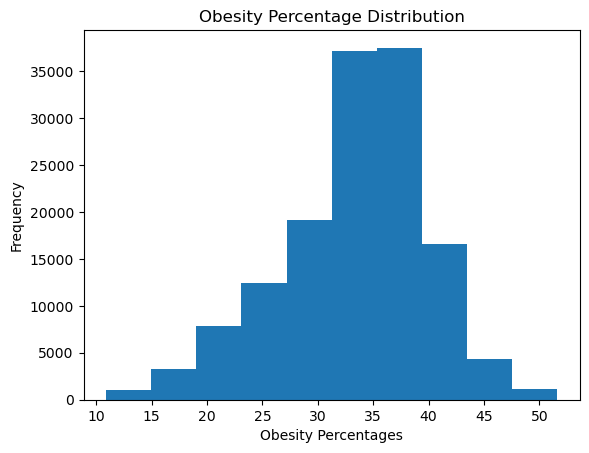

Average Obesity and overweight classification across US is: 33.36140350877193
NormaltestResult(statistic=44.232132298720614, pvalue=2.4837879164624944e-10)
NormaltestResult(statistic=951.8451561908965, pvalue=2.039156321292059e-207)


<Figure size 640x480 with 0 Axes>

In [21]:
# Filter our dataframe for Obesity and Overweight classification only
Obesity_df= reduced_df.loc[(reduced_df['Class']=='Obesity / Weight Status')]

#plot the histogram to show the Obesity percentage distribution
plt.hist(Obesity_df['Percentage'])
plt.title('Obesity Percentage Distribution')
plt.xlabel('Obesity Percentages')
plt.ylabel('Frequency')
plt.show()

#save to image folder
plt.savefig("Images/obesitypercentage-Distribution")

print("Average Obesity and overweight classification across US is:", Obesity_df['Percentage'].mean())
print(st.normaltest(Obesity_df['Percentage'].sample(1000)))
print(st.normaltest(Obesity_df['Percentage'].sample(20000)))

##### The histogram provides a visual representation of the distribution of the obesity percentages across US states. It shows that the majority of surveys completed within US (35k number of data point) are mainly distributed at 31% - 38% of the obesity percentage.
##### Normality Tests: Both tests reject the null hypothesis with p-values <0.05, which confirms that the obesity percentage distribution is not normal, which may indicate the presence of outliers or a non-uniform distribution of obesity rates across age groups.

In [18]:
#Identyfying potential outliers for Obesity and Overweight classification percentage

quartiles = Obesity_df['Percentage'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq=quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of obesity & overweight  percentage is: {lowerq}")
print('------------------------------------------------------')
print(f"The upper quartile of obesity & overweight  percentage is: {upperq}")
print('------------------------------------------------------')
print(f"The interquartile range of obesity & overweight  percentage is: {iqr}")
print('------------------------------------------------------')
print(f"The median of obesity & overweight  percentage is: {quartiles[0.5]} ")
print('------------------------------------------------------')
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print('------------------------------------------------------')
print(f"Values above {upper_bound} could be outliers.")
print('------------------------------------------------------')
outliers_percentage = Obesity_df.loc[(Obesity_df['Percentage'] < lower_bound) | (Obesity_df['Percentage'] > upper_bound)]
print(f'The Age group with significantly lower obesity and overweight classification percentage is {outliers_percentage["AgeRange"].min()}')
print(f'The Age group with significantly higher obesity and overweight classification percentage is {outliers_percentage["AgeRange"].max()}')

The lower quartile of obesity & overweight  percentage is: 29.7
------------------------------------------------------
The upper quartile of obesity & overweight  percentage is: 37.7
------------------------------------------------------
The interquartile range of obesity & overweight  percentage is: 8.000000000000004
------------------------------------------------------
The median of obesity & overweight  percentage is: 34.3 
------------------------------------------------------
Values below 17.699999999999996 could be outliers.
------------------------------------------------------
Values above 49.70000000000001 could be outliers.
------------------------------------------------------
The Age group with significantly lower obesity and overweight classification percentage is 18 - 24
The Age group with significantly higher obesity and overweight classification percentage is 65 or older


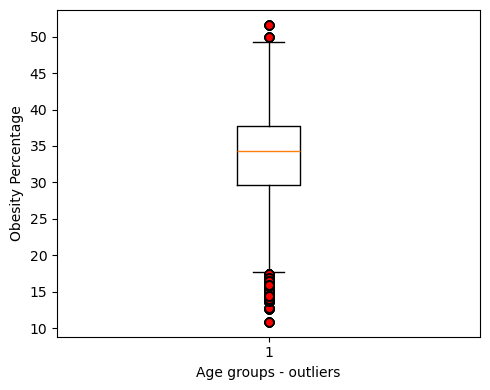

<Figure size 640x480 with 0 Axes>

In [22]:
#boxplot the outliers
plt.figure(figsize=(5,4))
boxplot = plt.boxplot(Obesity_df['Percentage'], showfliers=True, vert=True)
for outlier in boxplot['fliers']:
    outlier.set(marker='o', markerfacecolor='red', markersize=6)

plt.ylabel("Obesity Percentage")
plt.xlabel('Age groups - outliers')
plt.tight_layout()
plt.show()

#save to image folder
plt.savefig("Images/obesity-outliers")


In [20]:
#generate a summary statistics of table of mean, median, variance, standard deviation, and SEM of the Obesity/Overweight percentage for each age group
stat_obesity_value = Obesity_df.groupby('AgeRange')['Percentage']

obesity_mean = stat_obesity_value.mean()
obesity_median = stat_obesity_value.median()
obesity_variance = stat_obesity_value.var()
obesity_std_dev= stat_obesity_value.std()
obesity_sem = stat_obesity_value.sem()

#Assemble the results into a single summary DataFrame
summary_statistics = pd.DataFrame({"Mean Obesity Value": obesity_mean,
                                   'Median Obesity Value': obesity_median,
                                   'Obesity Variance': obesity_variance,
                                   'Obesity Std. Dev': obesity_std_dev,
                                   'Obesity Std. Err.': obesity_sem})
summary_statistics


,Mean Obesity Value,Median Obesity Value,Obesity Variance,Obesity Std. Dev,Obesity Std. Err.
AgeRange,,,,,
18 - 24,23.206579,23.30,19.122879,4.372971,0.028582
25 - 34,32.383882,32.30,16.910627,4.112253,0.026878
35 - 44,35.884868,35.60,18.509180,4.302230,0.028120
45 - 54,37.642434,36.95,22.953884,4.791021,0.031315
55 - 64,37.018421,36.80,13.447801,3.667124,0.023969
65 or older,34.032237,35.30,25.555250,5.055220,0.033041


### Overall the statistic summary and visualizations of Obesity and overweight classification on different age-groups indicates:
##### a) Observing the mean value of Obesity percentage for different age-groups we can see that obesity percentage generally increase with age especially peaking in the 45 - 54 age range. (The higher the mean value the possibalities of obesity is more on that age-group)
##### b) Distribution Symmetry: Median values are close to the mean in most age groups, suggesting a generally symmetric distribution of obesity percentages. Slight deviations indicate possible skewness in some groups like 45-54 and 65-older.
##### C) Variability: The 45-54 and 65+ age groups have the most variation in obesity percentages, showing the widest range of obesity rates among individuals in these groups.